In [366]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.ndimage.interpolation import rotate
from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter
import numpy as np
import cv2


Implement a function that performs non-maximum suppression. You can leave it for the end

In [242]:
def nonmax_suppression2(harris_resp, thr, halfwidth=2):
    # Outputs:
    # 1) cornersy: list with row coordinates of identified corner pixels.
    # 2) cornersx: list with respective column coordinates of identified corner pixels.
    # Elements from the two lists with the same index must correspond to the same corner.
    
    cornersy = []
    cornersx = []
    xy_responses = []
    w, h = harris_resp.shape[:2]
    for x in range(1, w-1):
        for y in range(1, h-1):
            xy_response = harris_resp[y, x]
            if xy_response >= thr:
                harris_neighborhood = [harris_resp[y, x - 1], harris_resp[y, x + 1], 
                                    # harris_resp[y - 1, x - 1], harris_resp[y - 1, x + 1],
                                    # harris_resp[y + 1, x - 1], harris_resp[y + 1, x + 1],
                                harris_resp[y - 1, x], harris_resp[y + 1, x], xy_response]
                maxs = max(harris_neighborhood)
                if xy_response == maxs:
                # argmax = np.argmax([i for i in harris_neighborhood])
                # argmax = np.argmax(harris_neighborhood)
                # if argmax == len(harris_neighborhood) - 1:
                    cornersx.append(x)
                    cornersy.append(y)
                    xy_responses.append(xy_response)

    return cornersy, cornersx, xy_responses

In [367]:
def nonmax_suppression(harris_resp, thr, halfwidth=2):
    # Outputs:
    # 1) cornersy: list with row coordinates of identified corner pixels.
    # 2) cornersx: list with respective column coordinates of identified corner pixels.
    # Elements from the two lists with the same index must correspond to the same corner.
    
    cornersy = []
    cornersx = []
    h, w = im.shape[:2]
    # TODO: perform non-maximum suppression
    for i in range(h):
        for j in range(w):
            if harris_resp[i,j] >= thr:
                # TODO: use neighborhood of 2
                if harris_resp[i,j] == max(harris_resp[i,j],
                        harris_resp[i,j+1],
                        harris_resp[i,j+2],
                        harris_resp[i,j-1],
                        harris_resp[i,j-2],
                        harris_resp[i+1,j],
                        harris_resp[i+2,j],
                        harris_resp[i-1,j],
                        harris_resp[i-2,j],
                        harris_resp[i+1,j+1], 
                        harris_resp[i+2,j+2], 
                        harris_resp[i-1,j+1], 
                        harris_resp[i-2,j+2], 
                        harris_resp[i+1,j-1], 
                        harris_resp[i+2,j-2], 
                        harris_resp[i-1,j-1],
                        harris_resp[i-2,j-2]):
                    cornersx.append(j)
                    cornersy.append(i)

    return cornersy, cornersx

In [368]:
for i in range(1, 5-1):
    for j in range(1, 5-1):
        print(f"(i,j) = ({i},{j})")

(i,j) = (1,1)
(i,j) = (1,2)
(i,j) = (1,3)
(i,j) = (2,1)
(i,j) = (2,2)
(i,j) = (2,3)
(i,j) = (3,1)
(i,j) = (3,2)
(i,j) = (3,3)


In [369]:
def plot(img1, img2, img3, t1, t2, t3):
    plt.close("all")
    plt.ion()
    f, ax_arr = plt.subplots(1, 3, figsize=(18, 16))
    ax_arr[0].set_title(t1)
    ax_arr[1].set_title(t2)
    ax_arr[2].set_title(t3)
    ax_arr[0].imshow(img1, cmap='gray')
    ax_arr[1].imshow(img2, cmap='gray')
    ax_arr[2].imshow(img3, cmap='gray')

Implement the main part of the exercise

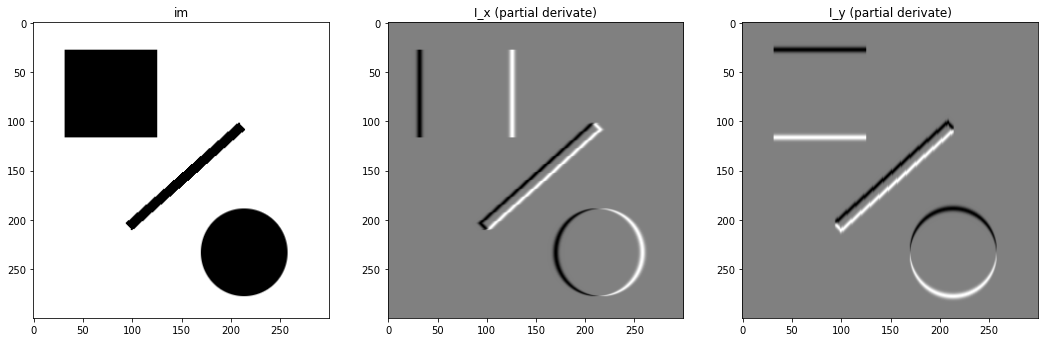

In [370]:
# Define parameters
sigma_w = 2.0
sigma_d = 2.0
kappa = 0.08
rot_angle = 0
thresh = 800  #8000

# Read the image
path = 'C:\\Users\\lukaszbinden\\git\\ethz-iacv-2020\\exercise_1\\'
im = cv2.imread(path + 'CircleLineRect.png', 0)
# im = cv2.imread(path + 'chessboard.png', 0)
im = im.astype('float')

# Rotation of the image
if rot_angle != 0:
    im = rotate(im, rot_angle)

# Implement Harris corners
# Useful functions: gaussian_filter1d, gaussian_filter

# 1) employing a two-dimensional isotropic Gaussian filter G_sigma_d and convolving its 
#    closed-form partial derivatives with I
I_x = gaussian_filter1d(im, axis=1, sigma=sigma_d, order=1)
I_y = gaussian_filter1d(im, axis=0, sigma=sigma_d, order=1)

plot(im, I_x, I_y, "im", "I_x (partial derivate)", "I_y (partial derivate)")


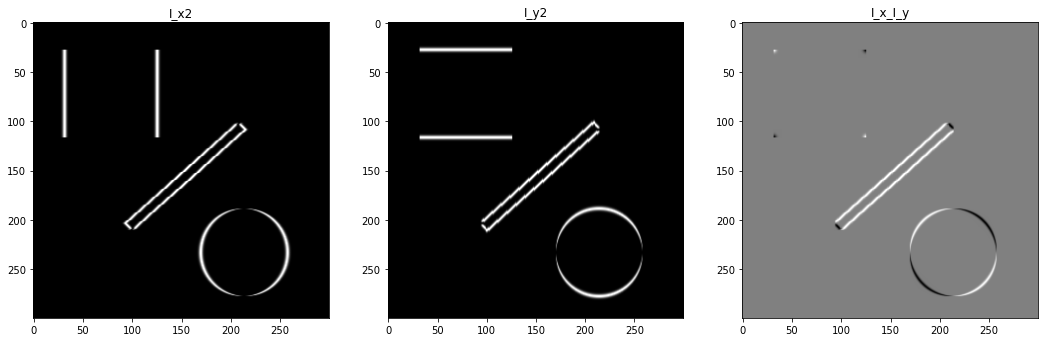

In [371]:
# 2) the second-order moments of partial intensity derivatives are computed, i.e., Ix^2, Iy^2, and Ix  Iy
I_x2 = np.square(I_x)
I_y2 = np.square(I_y)
I_x_I_y = I_x * I_y

plot(I_x2, I_y2, I_x_I_y, "I_x2", "I_y2", "I_x_I_y")

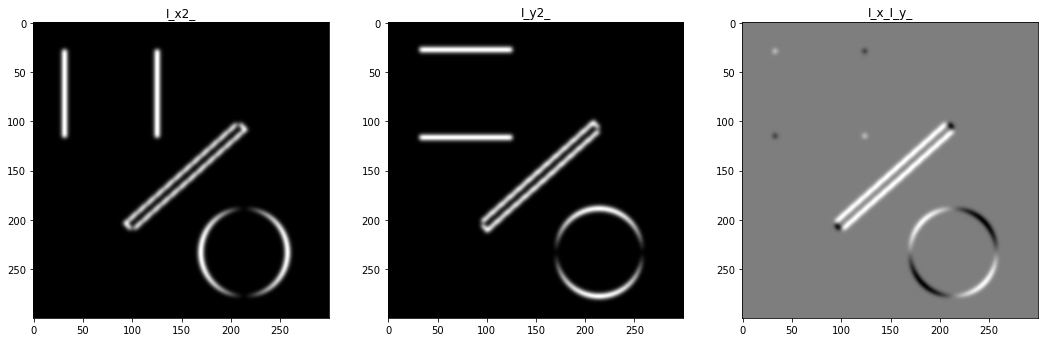

In [372]:
# 3) each of these second-order moments is smoothed isotropically with another two-dimensional Gaussian 
#    filter G_sigma_w, where in principle sigma_w > sigma_d.
I_x2_ = gaussian_filter(I_x2, sigma=sigma_w)
I_y2_ = gaussian_filter(I_y2, sigma=sigma_w)
I_x_I_y_ = gaussian_filter(I_x_I_y, sigma=sigma_w)

plot(I_x2_, I_y2_, I_x_I_y_, "I_x2_", "I_y2_", "I_x_I_y_")

In [373]:
# 4) the calculation of the Harris response H = det(A) - k(trace(A))2, where k is a positive constant
H = I_x2_ * I_y2_ - I_x_I_y * I_x_I_y  - kappa * (I_x2_ + I_y2_)**2

# 5) In order to determine the corner locations in I as a set of isolated pixels, the fifth 
#    and final step is to apply non-maximum suppression to H
corn = nonmax_suppression(H, thresh, 2)

In [374]:
len(corn[0])

184

Visualization of the results

###### Plotting of results

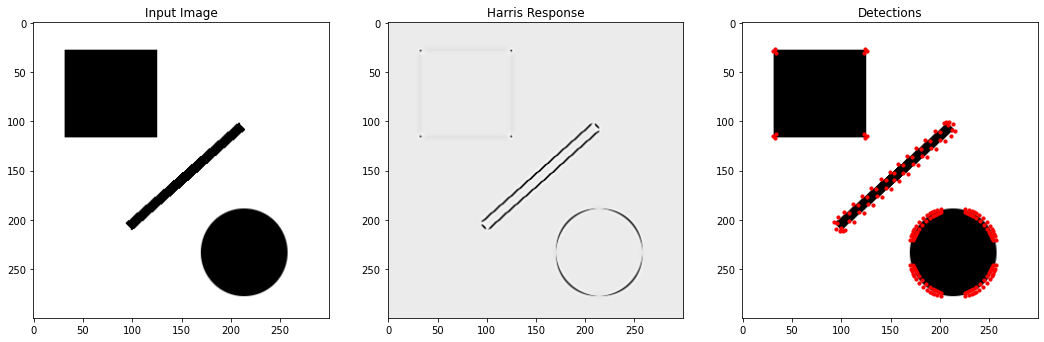

In [375]:
plt.close("all")
plt.ion()
f, ax_arr = plt.subplots(1, 3, figsize=(18, 16))
ax_arr[0].set_title("Input Image")
ax_arr[1].set_title("Harris Response")
ax_arr[2].set_title("Detections")
ax_arr[0].imshow(im, cmap='gray')
ax_arr[1].imshow(H, cmap='gray')
ax_arr[2].imshow(im, cmap='gray')
ax_arr[2].scatter(x=corn[1], y=corn[0], c='r', s=10)

In [376]:
plt.hist(corn[2])

IndexError: tuple index out of range